In [7]:
import numpy as np
import pandas as pd

In [8]:
v =  pd.read_csv('Churn_Modelling.csv')

In [9]:
v.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
v.shape
# only 14 columns we have here
# but rows are 1000 k quite big

(10000, 14)

In [11]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
v.duplicated().sum()
# no any duplicate row is here

np.int64(0)

In [13]:
v["Exited"].value_counts()
# 2037 customer have left the bank ....

,count
Exited,
0,7963
1,2037


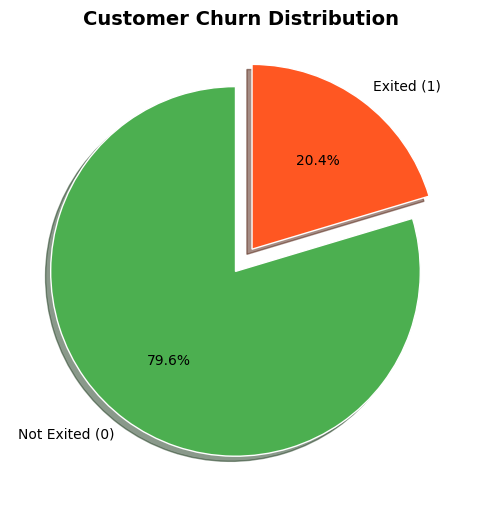

In [14]:
import matplotlib.pyplot as plt

# Count values
counts = v["Exited"].value_counts()

# Labels and explode setup
labels = ['Not Exited (0)', 'Exited (1)']
explode = [0.05, 0.1]  # slice ko thoda alag dikhana ke liye

# Color palette
colors = ['#4CAF50', '#FF5722']  # Green for retained, Orange/Red for exited

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}  # slices ke beech me white border
)
plt.title("Customer Churn Distribution", fontsize=14, fontweight='bold')
plt.show()


In [15]:
 v = v.drop(columns = ["RowNumber" , "CustomerId" , "Surname"] , axis = 1)

In [16]:
v.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

**here we are doing one hot encoding in categorical column**

In [17]:
v = pd.get_dummies(v, columns=["Geography", "Gender"], drop_first=True, dtype=int)


In [18]:
v

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [19]:
v.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


In [20]:
# Correlation of all numeric columns with 'Exited'
correlation = v.corr()['Exited'].sort_values(ascending=False)
print(correlation)


# by this correlation we can  say that more age slightly leads
# more churn ...


Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64


In [21]:
x = v.drop(columns = ["Exited"])
y = v["Exited"]

In [22]:
from sklearn.model_selection import  train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state = 1)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=11))
model.add(Dropout(0.3))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))







/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss = "binary_crossentropy" , optimizer = "Adam", metrics = ["accuracy"])


# 1. model.compile()

# It tells your neural network how to learn —
# i.e., which loss function to minimize and
# which optimizer to use while training.




#  Part 1 → loss="binary_crossentropy"

# This defines what your model is trying to minimize.
# "binary_crossentropy" is used for binary classification problems
# (like predicting whether a customer will exit or not, 0 or 1)



#  Part 2 → optimizer="adam"

# The optimizer decides how the model updates its weights during training.
# “Adam” = Adaptive Moment Estimation
# It’s one of the most popular and efficient optimizers in deep learning.
# In simple words:
# Adam helps the model learn faster and smarter,
#  by adjusting how much each weight should change after every step.

In [29]:
history = model.fit(x_train_scaled , y_train  , epochs = 100 , validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7539 - loss: 0.5767 - val_accuracy: 0.7975 - val_loss: 0.4579
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.4641 - val_accuracy: 0.7975 - val_loss: 0.4385
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8029 - loss: 0.4470 - val_accuracy: 0.8031 - val_loss: 0.4305
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8051 - loss: 0.4442 - val_accuracy: 0.8163 - val_loss: 0.4211
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8152 - loss: 0.4219 - val_accuracy: 0.8288 - val_loss: 0.4107
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8193 - loss: 0.4270 - val_accuracy: 0.8288 - val_loss: 0.4000
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8210 - loss: 0.4164 - val_accuracy: 0.8338 - val_loss: 0.3933
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8290 - loss: 0.4056 - val_accu

In [30]:
history.history
# training loss of every epoch

{'accuracy': [0.7853124737739563,
  0.7979687452316284,
  0.8010937571525574,
  0.8087499737739563,
  0.8121874928474426,
  0.8185937404632568,
  0.827343761920929,
  0.8264062404632568,
  0.836718738079071,
  0.8314062356948853,
  0.8395312428474426,
  0.8409374952316284,
  0.8434374928474426,
  0.8428124785423279,
  0.8482812643051147,
  0.8471875190734863,
  0.8487499952316284,
  0.8535937666893005,
  0.8473437428474426,
  0.8512499928474426,
  0.8520312309265137,
  0.8532812595367432,
  0.8560937643051147,
  0.8560937643051147,
  0.8517187237739563,
  0.8520312309265137,
  0.8559374809265137,
  0.8556249737739563,
  0.8584374785423279,
  0.856249988079071,
  0.8614062666893005,
  0.8570312261581421,
  0.8567187786102295,
  0.8568750023841858,
  0.8568750023841858,
  0.8584374785423279,
  0.8604687452316284,
  0.8609374761581421,
  0.8581249713897705,
  0.8575000166893005,
  0.8578125238418579,
  0.859375,
  0.8582812547683716,
  0.8582812547683716,
  0.8612499833106995,
  0.8585937

In [31]:
len(history.history['loss'])


100

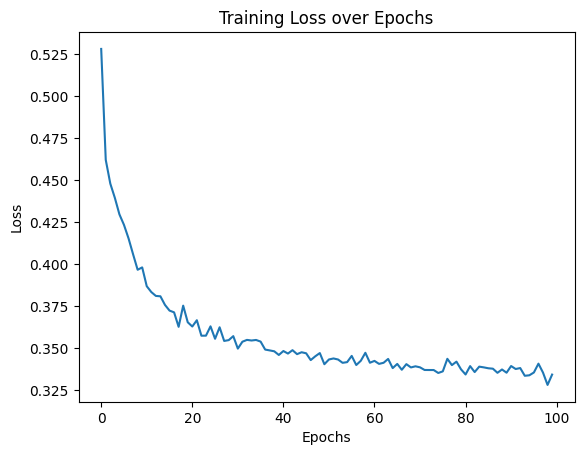

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


# it telling before how my loss was at extreme
# after getting trained by every epochs how my loss
# graph is getting decreased....


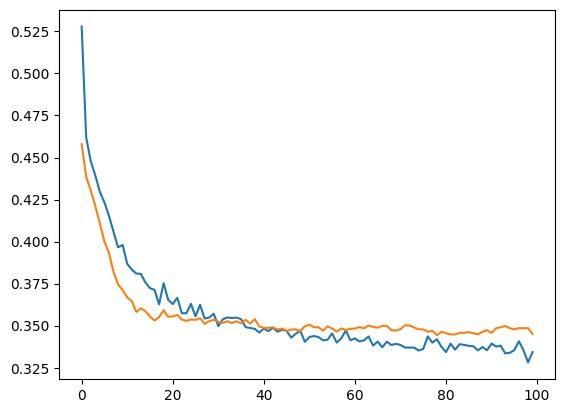

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


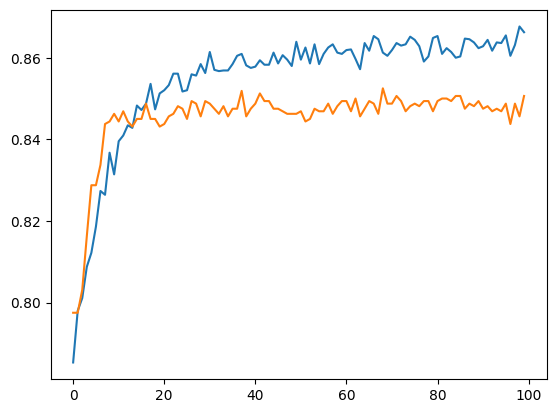

In [34]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [35]:
model.layers[0].get_weights()
# by this code we can see the weights and baises inside
# our model of input to first hidden layers

[array([[ 1.35295317e-02,  6.13589846e-02, -5.06709330e-03,
         -1.56325232e-02, -2.13936213e-02, -6.74039423e-02,
         -2.07798183e-02, -9.07582939e-02, -1.83470458e-01,
         -1.05211087e-01, -4.38389145e-02,  1.78855836e-01,
          9.21308771e-02, -3.78156938e-02,  2.35785288e-03,
         -1.70465991e-01,  5.63085219e-03,  2.85455555e-01,
          8.92868191e-02,  2.97026001e-02, -6.85265288e-02,
          8.83143991e-02, -1.61927685e-01, -1.32313743e-01,
         -1.12255894e-01,  3.66008207e-02, -2.18715966e-02,
          1.49744272e-01, -1.90008935e-02, -1.40321597e-01,
         -3.71076539e-02,  7.73078725e-02],
        [ 2.97230631e-01,  1.29344895e-01,  3.53956252e-01,
         -2.35243980e-02, -7.69664288e-01, -4.63345647e-01,
          1.49672464e-01,  9.10204947e-02,  2.31487766e-01,
          2.95130163e-01,  4.65422064e-01, -5.28132856e-01,
         -8.27340007e-01,  3.45516175e-01,  4.16035116e-01,
          3.39704938e-02,  6.74089715e-02,  1.74405411e-

In [36]:
model.layers[1].get_weights()
# # by this code we can see the weights and baises inside
# our model of hidden nueron  to output nueron


[]

In [37]:
model.predict(x_test_scaled)
# here is every prediction of my every given test input
#  here is just probability not 0 and 1 ...because we have used sigmoid
# activation ..now we will decide threshhold manually
# To make the probability  0 and 1


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.03491817],
       [0.08180683],
       [0.05927834],
       ...,
       [0.01355508],
       [0.04048164],
       [0.27347627]], dtype=float32)

In [38]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
# so suppose if our probability of input is above 0.5
#  we will considered that it will leave the bank ..or being churned
#  and turned that probability into 1 ...otherwise if lesser than 0.5
#  we will turned to 0 ...

y_pred_ann = np.where(y_log> 0.5 , 1 , 0)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred_ann)*100

# our accuracy is 81 percent but if we properly
# tune it we may increase the accuarcay
# 1. incresing the number of epochs

# 2. if we change the activation function of hidden layer
# and keep relu activation it may effective

# 3. if we increase the number of hidden layers nuerons
#      than may it contribute best


85.9

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("accuracy_score" , accuracy_score(y_test , y_pred_ann)*100)
print("Precision:", precision_score(y_test, y_pred_ann))
print("Recall:", recall_score(y_test, y_pred_ann))
print("F1 Score:", f1_score(y_test, y_pred_ann))


accuracy_score 85.9
Precision: 0.7782426778242678
Recall: 0.44819277108433736
F1 Score: 0.5688073394495413


**parameters for tunning the models**

In [42]:

# updation should be here because i have made more complex nueral
# network now .....




# model.add(Dense(3 , activation = "sigmoid" , input_dim = 11))
# will  change  3 to 4 ....
# will change activation sigmoid to relu
# will add another layer
# model.add(dense(11 , activation = relu)
# lets change the code part and tune i t improve the accuracy
# in artitecture column...

# now will make change in complile code too
# adding accuracy metrics too


# made cahnge in mmodel fit code too
# means  inceasing epochs 10 to now 100 , and add validation split = 0.2
# now data willbe trainned at 80 nad every epoch it will predict
# and will tell the accuracy at every epoch ...
# finally after running every epochs we can get accuracy by real 20 perecents
# iputs too....


# warning ::

# after tuning if only training acuracy is gettng increased
# and validation accuracy is stagnant it means that somewhere
# it is the case of overfitting ... means model is completely
# overfitted



# before tunning we are getting the accuracy of 81 percent
# now we are getting the accuracy of 85 percent

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train XGBoost
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42)


xgb.fit(x_train, y_train)

# Predict
y_pred = xgb.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))




Accuracy: 0.8655
Precision: 0.7967479674796748
Recall: 0.472289156626506
F1 Score: 0.5930408472012103


In [57]:
# Data dictionary
metrics = {
    "ANN": {
        "Accuracy": 85.9,
        "Precision": 0.7782426778242678,
        "Recall": 0.44819277108433736,
        "F1 Score": 0.5688073394495413
    },
    "XGBoost": {
        "Accuracy": 86.55,
        "Precision": 0.7967479674796748,
        "Recall": 0.472289156626506,
        "F1 Score": 0.5930408472012103
    }
}

# File me write karte hain
with open("models_metrics_eq_format.txt", "w") as f:
    for model, model_metrics in metrics.items():
        f.write(f"Model={model}\n")
        for metric, value in model_metrics.items():
            f.write(f"{metric}={value}\n")
        f.write("\n")  # Blank line between models

print("Metrics saved in 'models_metrics_eq_format.txt'")


Metrics saved in 'models_metrics_eq_format.txt'


In [59]:
import pandas as pd
import numpy as np

# Example: y_pred_ann from ANN
# y_pred_ann = np.where(y_log > 0.5, 1, 0)

# Make sure it's 1D
y_pred_ann = y_pred_ann.flatten()  # Flatten if it's 2D

# Generate Customer IDs if not available
customer_ids = np.arange(1, len(y_pred_ann)+1)

# Create DataFrame
df = pd.DataFrame({
    "CustomerID": customer_ids,
    "Predicted_Churn": y_pred_ann
})

# Save to CSV
df.to_csv("ANN_predictions.csv", index=False)

print("ANN predictions saved in 'ANN_predictions.csv'")



ANN predictions saved in 'ANN_predictions.csv'
